In [65]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver
import os

In [66]:
### Model Definition:
model=ChatGroq(
    model="llama-3.1-8b-instant",
    api_key=os.getenv("API_KEY")
)

In [67]:
## Defining state:
class JokeState(TypedDict):
    Topic:str
    Joke:str
    Explanation:str


In [68]:
def joke_generator(state:JokeState):
    prompt=f"Just Generate a Small Funny Joke on following Topic:{state['Topic']}"
    response=model.invoke(prompt)
    return {"Joke":response}


In [69]:
def joke_explanation(state:JokeState):
    prompt=f"Give me a Small explanation of this joke:{state['Joke']} whose topic is{state['Topic']}"
    response=model.invoke(prompt)
    return {"Explanation":response}

In [70]:
## Defining graph:
graph=StateGraph(JokeState)


## Adding nodes to Graph:
graph.add_node(name="joke_generator",node=joke_generator)
graph.add_node(name="joke_explanation",node=joke_explanation)


## Adding Edges to Graph:
graph.add_edge(START,"joke_generator")
graph.add_edge("joke_generator","joke_explanation")
graph.add_edge("joke_explanation",END)

Checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=Checkpointer)

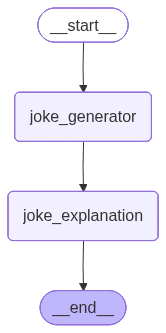

In [71]:
workflow

In [78]:
config={'configurable':{'thread_id':'1'}}
workflow.invoke({'Topic':"Pizza"},config=config)

{'Topic': 'Pizza',
 'Joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 47, 'total_tokens': 67, 'completion_time': 0.029149266, 'prompt_time': 0.00228179, 'queue_time': 0.04895532, 'total_time': 0.031431056}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--54b533c2-5748-45b8-8859-0fb218e00c35-0', usage_metadata={'input_tokens': 47, 'output_tokens': 20, 'total_tokens': 67}),
 'Explanation': AIMessage(content='This joke is a play on words. "Crusty" has a double meaning here:\n\n1. A pizza crust is a part of the pizza\'s structure.\n2. "Feeling a little crusty" is an idiom that means feeling a bit grumpy or irritable.\n\nSo, the joke is saying that the pizza went to the doctor because it (the pizza

In [79]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'Topic': 'Pizza', 'Joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 47, 'total_tokens': 67, 'completion_time': 0.029149266, 'prompt_time': 0.00228179, 'queue_time': 0.04895532, 'total_time': 0.031431056}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--54b533c2-5748-45b8-8859-0fb218e00c35-0', usage_metadata={'input_tokens': 47, 'output_tokens': 20, 'total_tokens': 67}), 'Explanation': AIMessage(content='This joke is a play on words. "Crusty" has a double meaning here:\n\n1. A pizza crust is a part of the pizza\'s structure.\n2. "Feeling a little crusty" is an idiom that means feeling a bit grumpy or irritable.\n\nSo, the joke is saying that the pizza went to the doctor b